In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('BostonHousing.csv')

In [3]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# Regression

### Relation between average number of rooms and the median value.

In [54]:
model1 = LinearRegression()
x = pd.DataFrame(data['rm'])
y = pd.DataFrame(data['medv'])
model1.fit(x, y)

LinearRegression()

(3.561, 9.0)

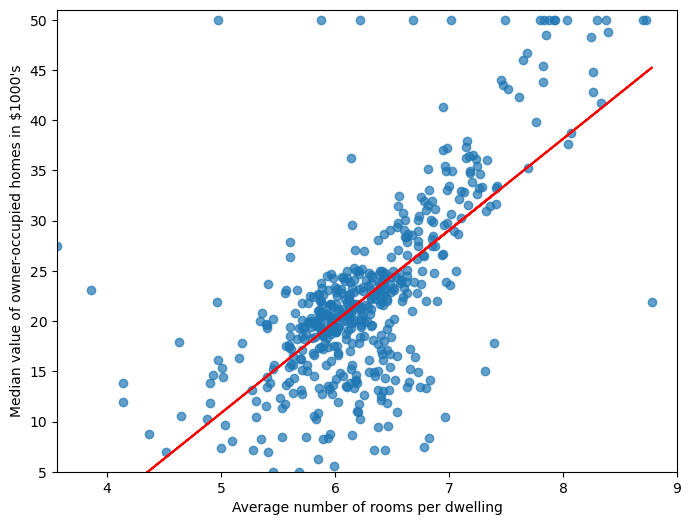

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(data.rm, data.medv, alpha=0.7)
plt.plot(x, model1.predict(x), color = 'r')
plt.locator_params(axis='y', nbins=15)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.ylim(5, 51)
plt.xlim(3.561, 9)


### Relation between average number of weighted distances and the median value.

In [57]:
model2 = LinearRegression()
x = pd.DataFrame(data['dis'])
y = pd.DataFrame(data['medv'])
model2.fit(x, y)

LinearRegression()

(1.0, 12.5)

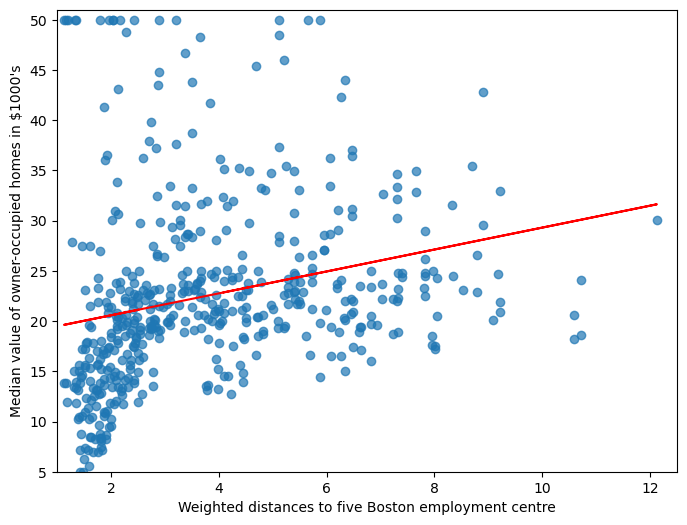

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(data.dis, data.medv, alpha=0.7)
plt.plot(x, model2.predict(x), color = 'r')
plt.locator_params(axis='y', nbins=15)
plt.xlabel('Weighted distances to five Boston employment centre')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.ylim(5, 51)
plt.xlim(1, 12.5)

### Relation between nitric oxides concentration and the median value.

In [62]:
model3 = LinearRegression()
x = pd.DataFrame(data['nox'])
y = pd.DataFrame(data['medv'])
model3.fit(x, y)

LinearRegression()

(0.38, 0.89)

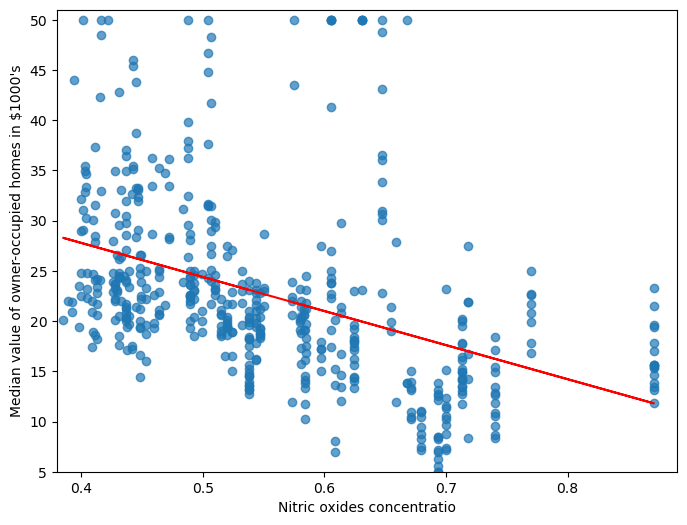

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(data.nox, data.medv, alpha=0.7)
plt.plot(x, model3.predict(x), color = 'r')
plt.locator_params(axis='y', nbins=15)
plt.xlabel('Nitric oxides concentratio')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.ylim(5, 51)
plt.xlim(0.38, 0.89)

### Relation between proportion of residential land zoned for lots over 25,000 sq.ft. and the median value.

In [119]:
# model4 = LinearRegression()
# x = pd.DataFrame(data['zn'])
# y = pd.DataFrame(data['medv'])
# model4.fit(x, y)

LinearRegression()

(-10.0, 100.0)

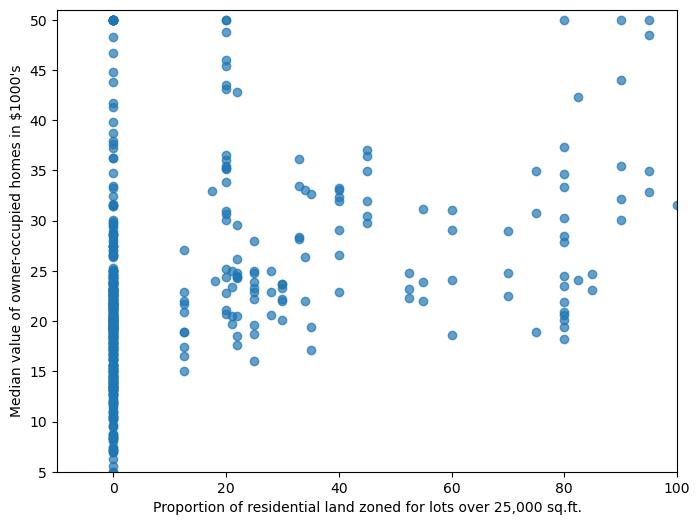

In [126]:
plt.figure(figsize=(8, 6))
plt.scatter(data.zn, data.medv, alpha=0.7)
# plt.plot(x, model4.predict(x), color = 'r')
plt.locator_params(axis='y', nbins=15)
plt.xlabel('Proportion of residential land zoned for lots over 25,000 sq.ft.')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.ylim(5, 51)
plt.xlim(-10, 100)

##### Gets frequency of the median value  as percentage

In [84]:
freq_medv = data['medv'].value_counts(normalize=True).reset_index().sort_values(by='proportion', ascending=False)
freq_medv['proportion'] = freq_medv['proportion'].apply(lambda x: x*100)
freq_medv

,medv,proportion
0,50.0,3.162055
1,25.0,1.581028
2,22.0,1.383399
3,21.7,1.383399
4,23.1,1.383399
...,...,...
158,12.6,0.197628
157,6.3,0.197628
156,10.8,0.197628
155,11.5,0.197628


### dividing median values into ranges

In [91]:
def get_num_people_by_median_ranges(data):
    data['median_range'] = pd.cut(x=data['medv'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10', '10-20', '20-30','30-40', '40-50'])
    return data
data = get_num_people_by_median_ranges(data)
data    

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,median_range
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,20-30
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,20-30
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30-40
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,30-40
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,20-30
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,20-30
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,20-30
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,20-30


In [100]:
data_medv = data.groupby('median_range', observed=True)['median_range'].agg([('number', 'count')]).reset_index()
data_medv

,median_range,number
0,0-10,24
1,10-20,191
2,20-30,207
3,30-40,53
4,40-50,31


 ### Distribution of towns by median values  

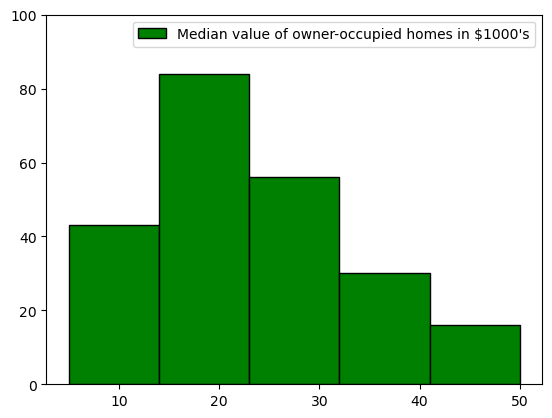

In [111]:
plt.hist(freq_medv['medv'], color = 'green', ec = 'black', bins=5)
plt.ylim(0, 100)
plt.legend(["Median value of owner-occupied homes in $1000's"])

 ### Distribution of towns by capita crime rate  

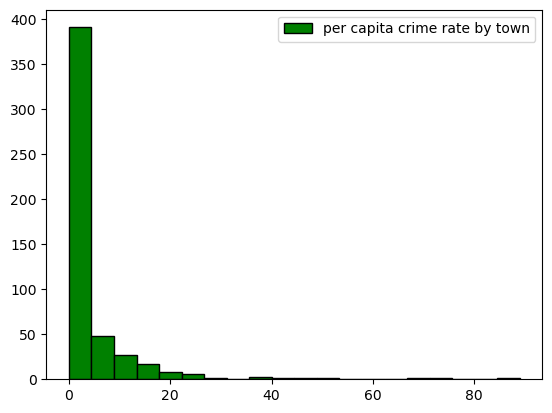

In [115]:
plt.hist(data['crim'], color = 'green', ec = 'black', bins=20)
plt.legend(["per capita crime rate by town"])

 ### Distribution of towns by pupil-teacher ratio

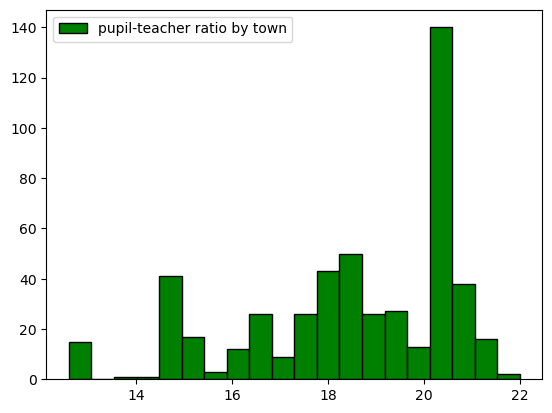

In [117]:
# pupil-teacher ratio by town
plt.hist(data['ptratio'], color = 'green', ec = 'black', bins=20)
plt.legend(["pupil-teacher ratio by town"])

In [118]:
data[data['ptratio'] == 22]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,median_range
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2,10-20
355,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6,20-30
